<a href="https://colab.research.google.com/github/abhityagi12/Simple-CNN-for-MNIST-handwritten-dataet/blob/master/Mnist_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import PIL
import keras
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Activation,Dropout, Flatten, Dense, Input
from keras.models import load_model, Model, Sequential
from keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [93]:
x_train.shape

(60000, 28, 28)

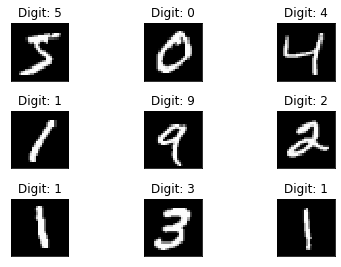

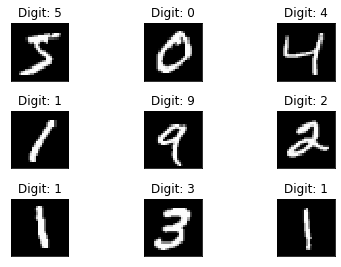

In [94]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [95]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [96]:
from keras.utils import to_categorical
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [0]:
def MyModel(input_shape):
    X_input=Input(input_shape)
    X=Conv2D(16,(5,5), strides=(1,1), name='conv1')(X_input)
    X=BatchNormalization(axis=3, name='bn1')(X)
    X=Activation('relu')(X)

    X=MaxPool2D((2,2),name='maxpool1')(X)

    X=Conv2D(32,(5,5), strides=(1,1), name='conv2')(X)
    X=BatchNormalization(axis=3, name='bn2')(X)
    X=Activation('relu')(X)

    # X=MaxPool2D((2,2), name='maxppol2')(X)

    X=Conv2D(64,(3,3),strides=(1,1), name='conv3')(X)
    X=BatchNormalization(axis=3, name='bn3')(X)
    X=Activation('relu')(X)

    X=Flatten()(X)
    X=Dense(10,activation='softmax', name='fc1')(X)
    model=Model(inputs=X_input,outputs=X,name='handwritten-digit-recognizer')
    return model

In [0]:
mnist_model=MyModel(x_train.shape[1:])

In [99]:
mnist_model.summary()

Model: "handwritten-digit-recognizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 16)        416       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 24, 24, 16)        64        
_________________________________________________________________
activation_50 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 12, 12, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 8, 32)          12832     
_________________________________________________________________
bn2 (BatchNormalization)     (None, 8,

In [0]:
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
mnist_model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [103]:
hist1=mnist_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=200, callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.3881 - accuracy: 0.8913 - val_loss: 0.1715 - val_accuracy: 0.9593
Epoch 2/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1318 - accuracy: 0.9649 - val_loss: 0.1034 - val_accuracy: 0.9741
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0944 - accuracy: 0.9749 - val_loss: 0.0799 - val_accuracy: 0.9782
Epoch 4/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0761 - accuracy: 0.9796 - val_loss: 0.0680 - val_accuracy: 0.9816
Epoch 5/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0651 - accuracy: 0.9824 - val_loss: 0.0592 - val_accuracy: 0.9833
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0576 - accuracy: 0.9849 - val_loss: 0.0557 - val_accuracy: 0.9841
Epoch 7/50
60000/60000 [==============================] - 5s 88us/s

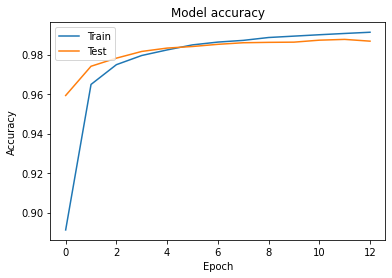

In [111]:
#plot train and val accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

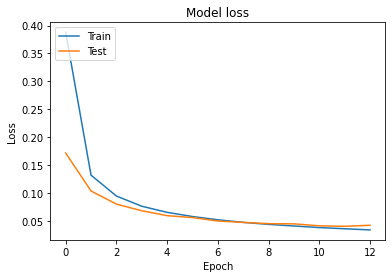

In [112]:
#plot train and val loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()